In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking for duplicates

In [7]:
duplicates=df[df.duplicated()]
print("Duplicate rows:\n",duplicates)

Duplicate rows:
 Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [8]:
#checking for Nullvalues
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
org_data=df.copy()

In [10]:
#imputing null values

In [11]:
for col in ['Cabin','Embarked']:
    mode_val = df[col].dropna().mode()[0]
    df[col].fillna(mode_val, inplace=True) 

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
#encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Ticket']=le.fit_transform(df['Ticket'])

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [17]:
#outlier detection

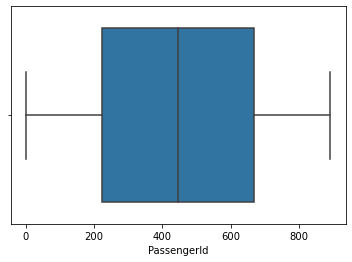

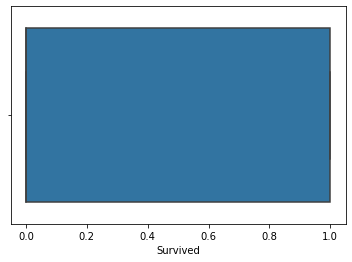

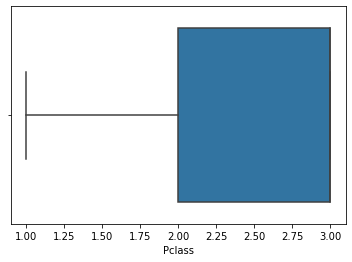

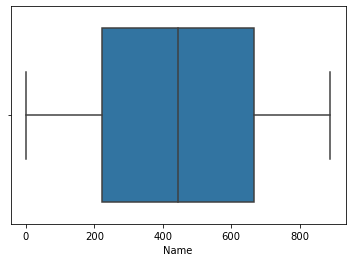

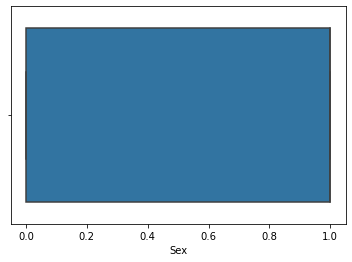

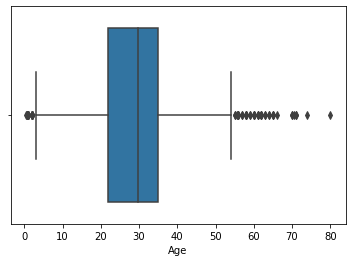

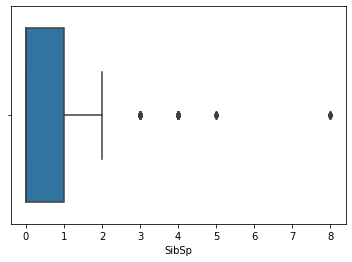

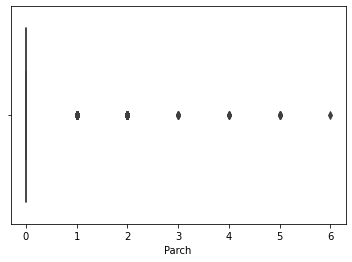

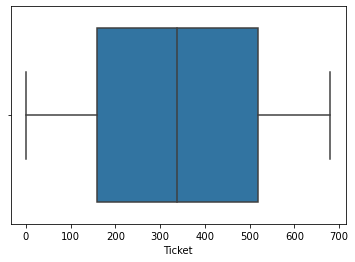

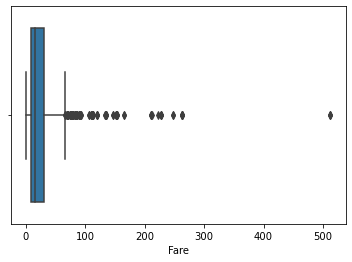

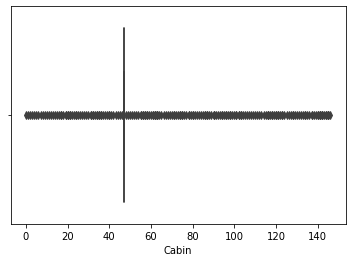

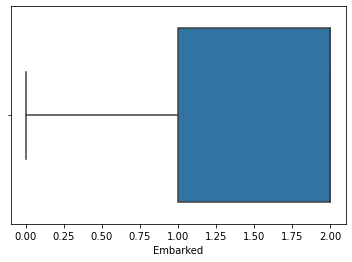

In [18]:
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [19]:
#outlier removal

In [20]:
from scipy import stats
IQR =stats.iqr(df.Age,interpolation='midpoint')
IQR

13.0

In [21]:
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(2.5, 54.5)

In [22]:
df.loc[df['Age']>max_limit,'Age']=np.median(df.Age)
df.loc[df['Age']<min_limit,'Age']=np.median(df.Age)

In [23]:
from scipy import stats
IQR =stats.iqr(df.Fare,interpolation='midpoint')
IQR

23.0896

In [24]:
Q1=df.Fare.quantile(0.25)
Q3=df.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-26.724, 65.6344)

In [25]:
df.loc[df['Fare']>max_limit,'Fare']=np.median(df.Fare)
df.loc[df['Fare']<min_limit,'Fare']=np.median(df.Fare)

In [26]:
x= df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y=df['Survived']

In [27]:
#split data to train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [29]:
#scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
from sklearn.metrics import accuracy_score

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [33]:
print( metric_k)

[0.7821229050279329, 0.770949720670391, 0.8156424581005587, 0.8044692737430168, 0.8212290502793296, 0.7821229050279329, 0.7988826815642458, 0.7821229050279329, 0.8100558659217877, 0.7932960893854749, 0.8100558659217877, 0.8156424581005587]


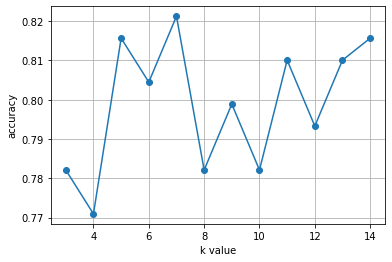

In [34]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [35]:
classifier=KNeighborsClassifier(n_neighbors=6,metric="minkowski",p=2)
model1=classifier.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred1)

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_test,y_pred1))
print("precision :",precision_score(y_test,y_pred1,average="weighted"))
print("recall_score :",recall_score(y_test,y_pred1,average="weighted"))
print("f1_score :",f1_score(y_test,y_pred1,average="weighted"))

Accuracy : 0.8044692737430168
precision : 0.8061441648130067
recall_score : 0.8044692737430168
f1_score : 0.8007541574693415


K-FOLD CROSSVALIDATION FOR KNN

In [37]:
from sklearn.model_selection import KFold

In [38]:
KFold_validator=KFold(10)

In [39]:
for train_index,test_index in KFold_validator.split(x,y):
    print("Training Index",train_index)
    print("Testing Index",test_index)

Training Index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cv_score=cross_val_score(model1,x,y,cv=KFold_validator)

In [42]:
cv_score

array([0.66666667, 0.68539326, 0.71910112, 0.66292135, 0.75280899,
       0.6741573 , 0.69662921, 0.71910112, 0.71910112, 0.68539326])

In [43]:
np.mean(cv_score)

0.6981273408239701

K-FOLD CROSSVALIDATION FOR KNN

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
skFold_validator=StratifiedKFold(n_splits=10)

In [46]:
for train_index,test_index in skFold_validator.split(x,y):
    print("Training Index",train_index)
    print("Testing Index",test_index)

Training Index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
skcv_score=cross_val_score(model1,x,y,cv=skFold_validator)

In [49]:
skcv_score

array([0.67777778, 0.66292135, 0.6741573 , 0.70786517, 0.78651685,
       0.64044944, 0.69662921, 0.74157303, 0.68539326, 0.68539326])

In [50]:
np.mean(skcv_score)

0.6958676654182272

# SVM

In [51]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_svm))
print("confusion matrix:",confusion_matrix(y_test,y_pred_svm))

accuracy : 0.7821229050279329
confusion matrix: [[88 17]
 [22 52]]


K-FOLD CROSSVALIDATION FOR SVM

In [52]:
from sklearn.model_selection import KFold

In [53]:
KFold_validator=KFold(10)

In [54]:
for train_index,test_index in KFold_validator.split(x,y):
    print("Training Index",train_index)
    print("Testing Index",test_index)

Training Index [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
cv_score=cross_val_score(svmclf,x,y,cv=KFold_validator)

In [57]:
cv_score

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [58]:
np.mean(cv_score)

0.786729088639201

stratified K-FOLD CROSSVALIDATION FOR SVM

In [59]:
from sklearn.model_selection import StratifiedKFold

In [60]:
skFold_validator=StratifiedKFold(n_splits=10)

In [61]:
for train_index,test_index in skFold_validator.split(x,y):
    print("Training Index",train_index)
    print("Testing Index",test_index)

Training Index [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
skcv_score=cross_val_score(svmclf,x,y,cv=skFold_validator)

In [64]:
skcv_score

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [65]:
np.mean(skcv_score)

0.786729088639201